## Synthetic Dataset Creation

This notebook generates synthetic heat stress data
and saves it into the data/ folder.

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 5000

data = pd.DataFrame({
    "temperature": np.random.uniform(25, 48, n),
    "humidity": np.random.uniform(20, 95, n),
    "wind_speed": np.random.uniform(0.5, 10, n),
    "uv_index": np.random.uniform(1, 12, n),
    "age": np.random.randint(18, 60, n),
    "working_hours": np.random.uniform(1, 12, n),
    "hydration_level": np.random.randint(1, 4, n)
})

data["risk_score"] = (
    0.5 * data["temperature"] +
    0.3 * data["humidity"] +
    2 * data["working_hours"] -
    6 * data["hydration_level"] +
    np.random.normal(0, 5, n)
)

data["risk_score"] = np.clip(data["risk_score"], 0, 100)

data.to_csv("../data/heat_stress_dataset.csv", index=False)

data.head()

,temperature,humidity,wind_speed,uv_index,age,working_hours,hydration_level,risk_score
0,33.614423,49.522664,4.049588,6.496373,39,9.465474,1,53.379480
1,46.866429,55.507674,3.662665,9.214214,19,11.781543,3,42.672334
2,41.835861,84.091054,2.173462,7.189335,21,11.978174,2,56.943409
3,38.769145,45.500329,6.269033,1.916328,30,10.737824,3,31.767220
4,28.588429,85.223726,5.027930,3.041383,49,1.874539,1,34.813957



## Exploratory Data Analysis

Goal:
- Understand distribution of features
- Analyze correlation
- Identify feature importance visually

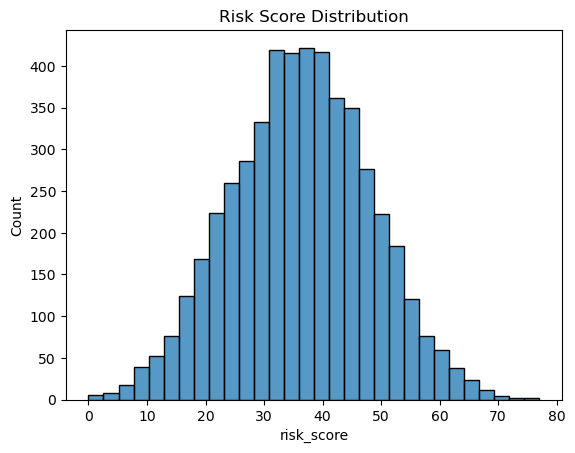

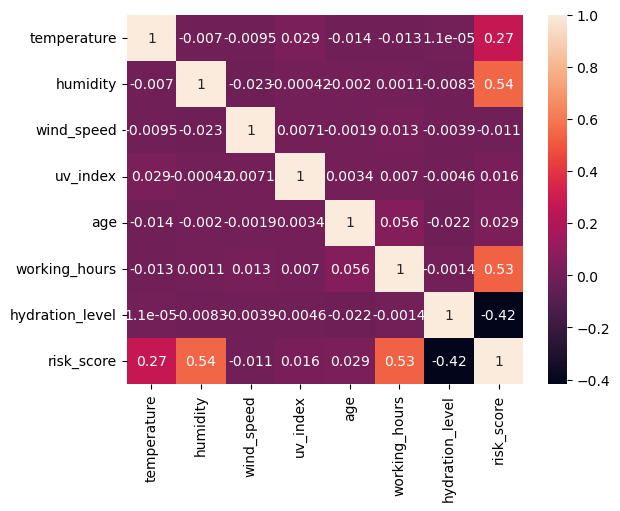

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("../data/heat_stress_dataset.csv")

plt.figure()
sns.histplot(data["risk_score"], bins=30)
plt.title("Risk Score Distribution")
plt.show()

plt.figure()
sns.heatmap(data.corr(), annot=True)
plt.show()